<a href="https://colab.research.google.com/github/Laxmi884/Sentiment-anlysis-on-Women-s-E-Commerce-Clothing-Reviews/blob/main/BAN200_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Women's E-Commerce Clothing Reviews

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:
#reading data from my drive others can comment this line add a same line with the link to their drive-Laxmikant
df = pd.read_csv('/content/drive/MyDrive/Datasets/Womens Clothing E-Commerce Reviews.csv')

In [63]:
df.shape

(23486, 11)

We have 23486 records and 11 attributes

Getting information about the attributes

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [65]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [66]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [67]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [68]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [69]:
df.loc[0,'Review Text']

'Absolutely wonderful - silky and sexy and comfortable'

In [70]:
print(f"number of unique clothing IDs {df['Clothing ID'].nunique()}")

number of unique clothing IDs 1206


In [71]:
# List of Division Names
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [72]:
# List of Department Names
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [73]:
# List of Class Names
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [74]:
# Number of null in each column
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

# Trying get some insights through exploratory analysis

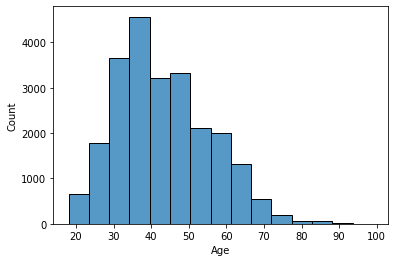

In [75]:
# Distribution of Age column
sns.histplot(df.Age, bins = 15)

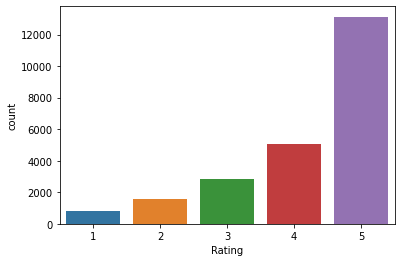

In [76]:
sns.countplot(df["Rating"])

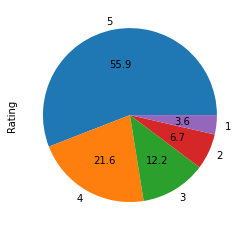

In [77]:
(df['Rating'].value_counts()).plot(kind = "pie", autopct='%1.1f')

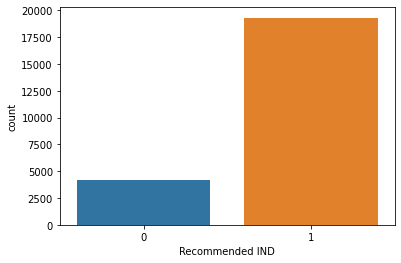

In [78]:
sns.countplot(df["Recommended IND"])

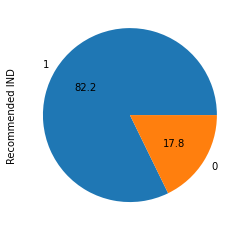

In [79]:
(df["Recommended IND"].value_counts()).plot(kind = "pie", autopct='%1.1f')

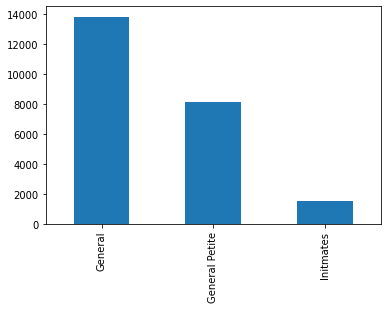

In [80]:
# Distribution of Division Names
df['Division Name'].value_counts().plot(kind = "bar")

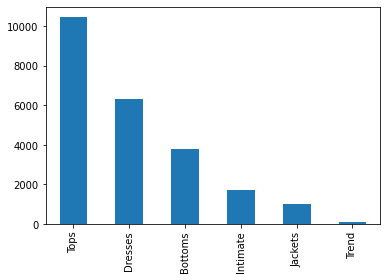

In [81]:
# Distribution of Department Names
df['Department Name'].value_counts().plot(kind = "bar")

In [82]:
# Checking for duplicated entries
duplicates = df.duplicated().sum() 
if  duplicates == 0:
    print("There are no duplicted rows in this data")
else:
    print(f"There are: {duplicates} duplicated rows")

There are no duplicted rows in this data


In [83]:
# Drop the duplicated rows
df=df.drop_duplicates()

In [84]:
# Drop rows with null values in "Review Text" column
df = df.dropna(subset=["Review Text"])

In [85]:
# Number of null in each column
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [86]:
# selecting only required columns for ML models
df_text = df[["Review Text", "Recommended IND"]]

In [87]:
# Preprocess the text with function processtext()

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")

stop_words = stopwords.words('english')
# Remove Negative verbs and "not" from stop_words
stop_words_new = stop_words[:-36]
stop_words_new.remove("not")

punctuations = list(string.punctuation)
lemma = WordNetLemmatizer() # for Lemmatisation

def processtext(text):
    text=re.sub("[^a-zA-Z]"," ",text) # Filter to allow only alphabets in text
    text=text.lower() # Convert the text to lowercase to maintain consistency
    tokens=word_tokenize(text) # Tokenize the text
    # Remove stopwords and punctuations
    tokens=[token for token in tokens if token not in stop_words_new and token not in punctuations] 
    tokens=[lemma.lemmatize(token) for token in tokens] # Lemmatisation of tokens
    text=" ".join(tokens)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Preprocess the "Review Text" column with function processtext()
df_text["processed_Review"] = df_text["Review Text"].apply(lambda x: processtext(x))

Since the classification data (recommended and not-recommended) is unbalanced, we will do over-sampling which involves adding more examples from the minority class. (can be removed)

In [89]:
# number of reviews that recommeneded the product
df_text[(df_text['Recommended IND']==1)].shape[0]

18540

In [90]:
from sklearn.utils import resample

# Create two different dataframes of majority and minority class 
df_majority = df_text[(df_text['Recommended IND']==1)] 
df_minority = df_text[(df_text['Recommended IND']==0)] 

# Oversample the minority class
df_minority_oversampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=15539 , # to match majority class with 18539 rows
                                 random_state=42)  # reproducible results
                                 
# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])

In [91]:
df_oversampled.shape

(34079, 3)

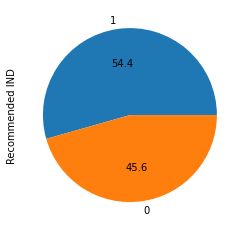

In [92]:
# Distribution of the new oversampled dataframe
df_oversampled['Recommended IND'].value_counts().plot(kind="pie", autopct='%1.1f')

In [93]:
# Define X and y for ML models
X = df_oversampled["processed_Review"]
y = df_oversampled["Recommended IND"]

# Machine learning models implementing 3 models logistic regression, linarsvc and randomfores classifier so that we can compare accuracy

In [94]:
# Convert a collection of text features to a matrix of word counts
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = (tfidf.fit_transform(X)).toarray()
# pd.DataFrame(X, columns = tfidf.get_feature_names())

# split the data (X, y) to train-data and test-data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, random_state=101)

from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [95]:
def ML_models_performance(model, X_train, y_train ,X_test ,y_test, y_pred, model_name):
 
    performance_df=pd.DataFrame({'Train_accuracy':model.score(X_train,y_train),"Test_accuracy":model.score(X_test,y_test),
                       "Precision":precision_score(y_pred,y_test),"Recall":recall_score(y_pred,y_test),
                       "F1_Score":f1_score(y_pred,y_test)}, index=[model_name])
    return performance_df

In [96]:
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model
lr = LogisticRegression( )
# Fit the model
lr.fit(X_train, y_train)
# Use the trained model to predict
y_pred = lr.predict(X_test)
# model accuracy
print(f'Model train accuracy: {lr.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {lr.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 91.146%
Model test accuracy: 89.290%
Model test precision: 0.896
Model test recall: 0.906
Model test f1_score: 0.901


In [97]:
lr_performance = ML_models_performance(lr, X_train, y_train ,X_test ,y_test, y_pred, "Logisitc Regression")
lr_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,0.911455,0.892899,0.89617,0.905943,0.90103


In [98]:
from sklearn.svm import LinearSVC
# Create the LinearSVC model with some regularization
LSVC = LinearSVC(random_state=1, dual=False, C=0.5)
# Fit the model
LSVC.fit(X_train, y_train)
# Use the trained model to predict
y_pred = LSVC.predict(X_test)

# model accuracy
print(f'Model train accuracy: {LSVC.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {LSVC.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 93.786%
Model test accuracy: 91.006%
Model test precision: 0.903
Model test recall: 0.930
Model test f1_score: 0.916


In [99]:
LSVC_performance = ML_models_performance(LSVC, X_train, y_train ,X_test ,y_test, y_pred, "LinearSVC")
LSVC_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
LinearSVC,0.937865,0.910065,0.902913,0.929742,0.916131


In [100]:
from sklearn.ensemble import RandomForestClassifier
# Create the RandomForestClassifier model
rfc = RandomForestClassifier(random_state=1)
# Fit the model
rfc.fit(X_train, y_train)
# Use the trained model to predict
y_pred = rfc.predict(X_test)
# model accuracy
print(f'Model train accuracy: {rfc.score(X_train, y_train)*100:.3f}%')
print(f'Model test accuracy: {rfc.score(X_test, y_test)*100:.3f}%')
print(f'Model test precision: {precision_score(y_pred,y_test):.3f}')
print(f'Model test recall: {recall_score(y_pred,y_test):.3f}')
print(f'Model test f1_score: {f1_score(y_pred,y_test):.3f}')

Model train accuracy: 100.000%
Model test accuracy: 97.080%
Model test precision: 0.962
Model test recall: 0.984
Model test f1_score: 0.973


In [101]:
rfc_performance = ML_models_performance(rfc, X_train, y_train ,X_test ,y_test, y_pred, "Random Forest")
rfc_performance

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Random Forest,1.0,0.970804,0.962244,0.983733,0.97287


In [104]:
comparison_df = pd.concat([lr_performance*100, LSVC_performance*100, rfc_performance*100])
comparison_df

,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
Logisitc Regression,91.145509,89.289906,89.617044,90.594329,90.103037
LinearSVC,93.786451,91.006455,90.291262,92.974174,91.613080
Random Forest,100.000000,97.080399,96.224380,98.373311,97.286980
